# Use of Clark & Hensley 2019 HI4PI-based Stokes parameter maps

This notebook demonstrates how to access the HI4PI-based data released with Clark & Hensley 2019. 

Data are here: https://doi.org/10.7910/DVN/P41KDE

Paper is here: https://ui.adsabs.harvard.edu/abs/2019ApJ...887..136C/abstract

More details on the data products can be found on the Harvard Dataverse page. Use of these data must cite Clark & Hensley 2019.

In [1]:
import numpy as np
import healpy as hp
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

Change the following paths as needed. The following demonstrates the use of the 3D Stokes maps (I(v), Q(v), U(v)). Scroll down for use of the velocity-integrated IQU maps. 

In [2]:
root = "../data/"

I_v_fn = root + "I_v_HI4PI_Kkms.h5"
Q_v_fn = root + "Q_v_HI4PI_Kkms.h5"
U_v_fn = root + "U_v_HI4PI_Kkms.h5"

The data are stored as healpix maps, one for each velocity channel.

The hdf5 dataset names are `IHI_v` for total intensity I(v), `QHI_v` for Q(v), and `UHI_v` for U(v).

Each dataset has size n_pixels x n_channels, where n_pixels = 12 x 1024^2, and n_channels = 41.

For convenience, velocity bin information is stored in this github repo in the `data` folder.

In [3]:
nu_startvels = np.load(root+"HI4PI_startvels.npy")
nu_stopvels = np.load(root+"HI4PI_stopvels.npy")
native_width = 1.28825 # native HI4PI channel width in km/s
chan_widths = nu_stopvels - nu_startvels + native_width # velocity widths of nonuniformly binned channels
chan_centers = nu_startvels + chan_widths/2.

In [4]:
# Open the I map for velocity slice 20 
vindx = 20
with h5py.File(I_v_fn, 'r') as f:
    Islice = f['IHI_v'][:, vindx]
    
v_slice = chan_centers[vindx]

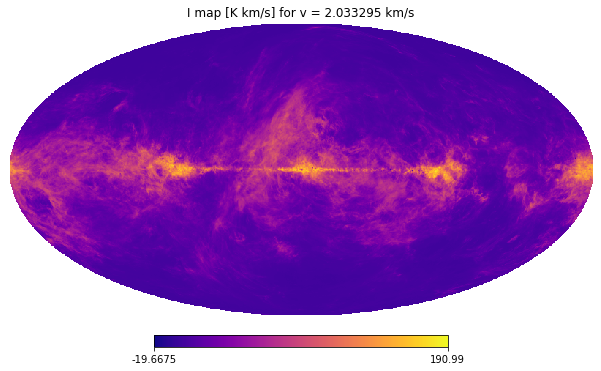

In [6]:
hp.mollview(Islice, cmap="plasma", title="I map [K km/s] for v = {} km/s".format(v_slice));

Text(0, 0.5, 'HI-based Stokes parameters [K km/s]')

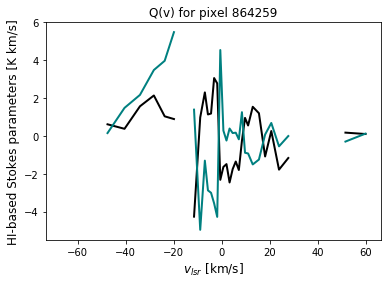

In [15]:
# Plot the Q and U spectra for all velocities, for a random pixel. 
# Note that not all velocities have HI-based Stokes parameters (see Clark & Hensley section 3.2)

pixindx = np.random.randint(12*1024**2)
with h5py.File(Q_v_fn, 'r') as f:
    Qspec = f['QHI_v'][pixindx, :]
with h5py.File(U_v_fn, 'r') as f:
    Uspec = f['UHI_v'][pixindx, :]

plt.plot(chan_centers, Qspec, color="black", lw=2)
plt.plot(chan_centers, Uspec, color="teal", lw=2)
plt.title("Q(v) for pixel {}".format(pixindx))
plt.xlabel("$v_{lsr}$ [km/s]", size=12)
plt.ylabel("HI-based Stokes parameters [K km/s]", size=12)

We also provide velocity-integrated I, Q, U maps. These are stored as standard healpix polarization FITS files.

In [17]:
IQU_fn = root + "IQU_integrated_HI4PI_Kkms.fits"
IHI, QHI, UHI = hp.read_map(IQU_fn, field=(0,1,2));

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


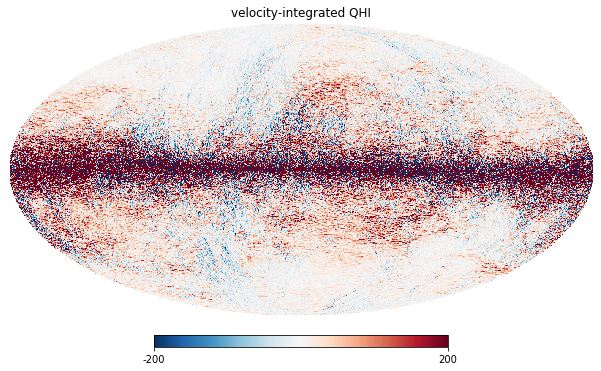

In [21]:
hp.mollview(QHI, cmap="RdBu_r", min=-200, max=200, title="velocity-integrated QHI");